In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

melbourne = pd.read_csv('/Users/cptnemo2005/Desktop/SEIR/population_basecase_75.csv', sep=',',header=None)
pop       = melbourne.values
pop       = np.nan_to_num(pop, copy = True)
pop       = pop.astype(int)

od_matrix = genfromtxt('/Users/cptnemo2005/Desktop/SEIR/OD_Matrix_basecase_75.csv', delimiter=',')
od_matrix = np.reshape(od_matrix, (12,309,309))
od_matrix = np.nan_to_num(od_matrix, copy = True)
od_matrix = od_matrix.astype(int)

#At this point only have 25% for pop and flow, now we scale them up

pop = pop*4
od_matrix = od_matrix*4

for i in range(1,12):
    pop[i,:] = pop[0,:]

to_this_origin   = np.sum(od_matrix,axis = 1)
from_this_origin = np.sum(od_matrix,axis = 2)

to_this_origin

from_this_origin

np.sum(pop,axis = 1)

pop = pop + to_this_origin - from_this_origin

import numpy as np
import pickle 
import matplotlib.pyplot as plt

from collections import namedtuple


Param = namedtuple('Param', 'R0 DI I0 HospitalisationRate HospiterIters')
r = od_matrix.shape[0]
n = pop.shape[1]
N = 4632672.0
import random

random.seed(30)
OD_id = [p for p in range (0,309)]
# Take 20 random location
initialInd = random.sample(OD_id, 20)

initial = np.zeros(n)
#Each location has 10 people infected at the beginning
initial[initialInd] = 15

model = Param(R0 = 2.4, DI = 5.2*12, I0 = initial, HospitalisationRate=0.1,HospiterIters=15*12)

%run virus-sim.py

alpha = np.ones(od_matrix.shape)
iterations = 3000
res = {}
inf = 10
res['baseline'] = sir(model,pop,od_matrix,alpha,iterations,inf)

/Users/cptnemo2005/Desktop/SEIR/virus-sim.py:56: RuntimeWarning: invalid value encountered in true_divide
  realflow = realflow / realflow.sum(axis=2)[:,:, np.newaxis]


In [9]:
newI_75 = res['baseline'][2]
newI_75.astype(int)

newI_75 = np.sum(newI_75,axis=0)

In [5]:
newI_25 = res['baseline'][2]
newI_25.astype(int)

newI_25 = np.sum(newI_25,axis=0)

In [7]:
newI_from_home = res['baseline'][2]
newI_from_home.astype(int)

newI_from_home = np.sum(newI_from_home,axis=0)

In [14]:
newI = newI_75 - newI_from_home

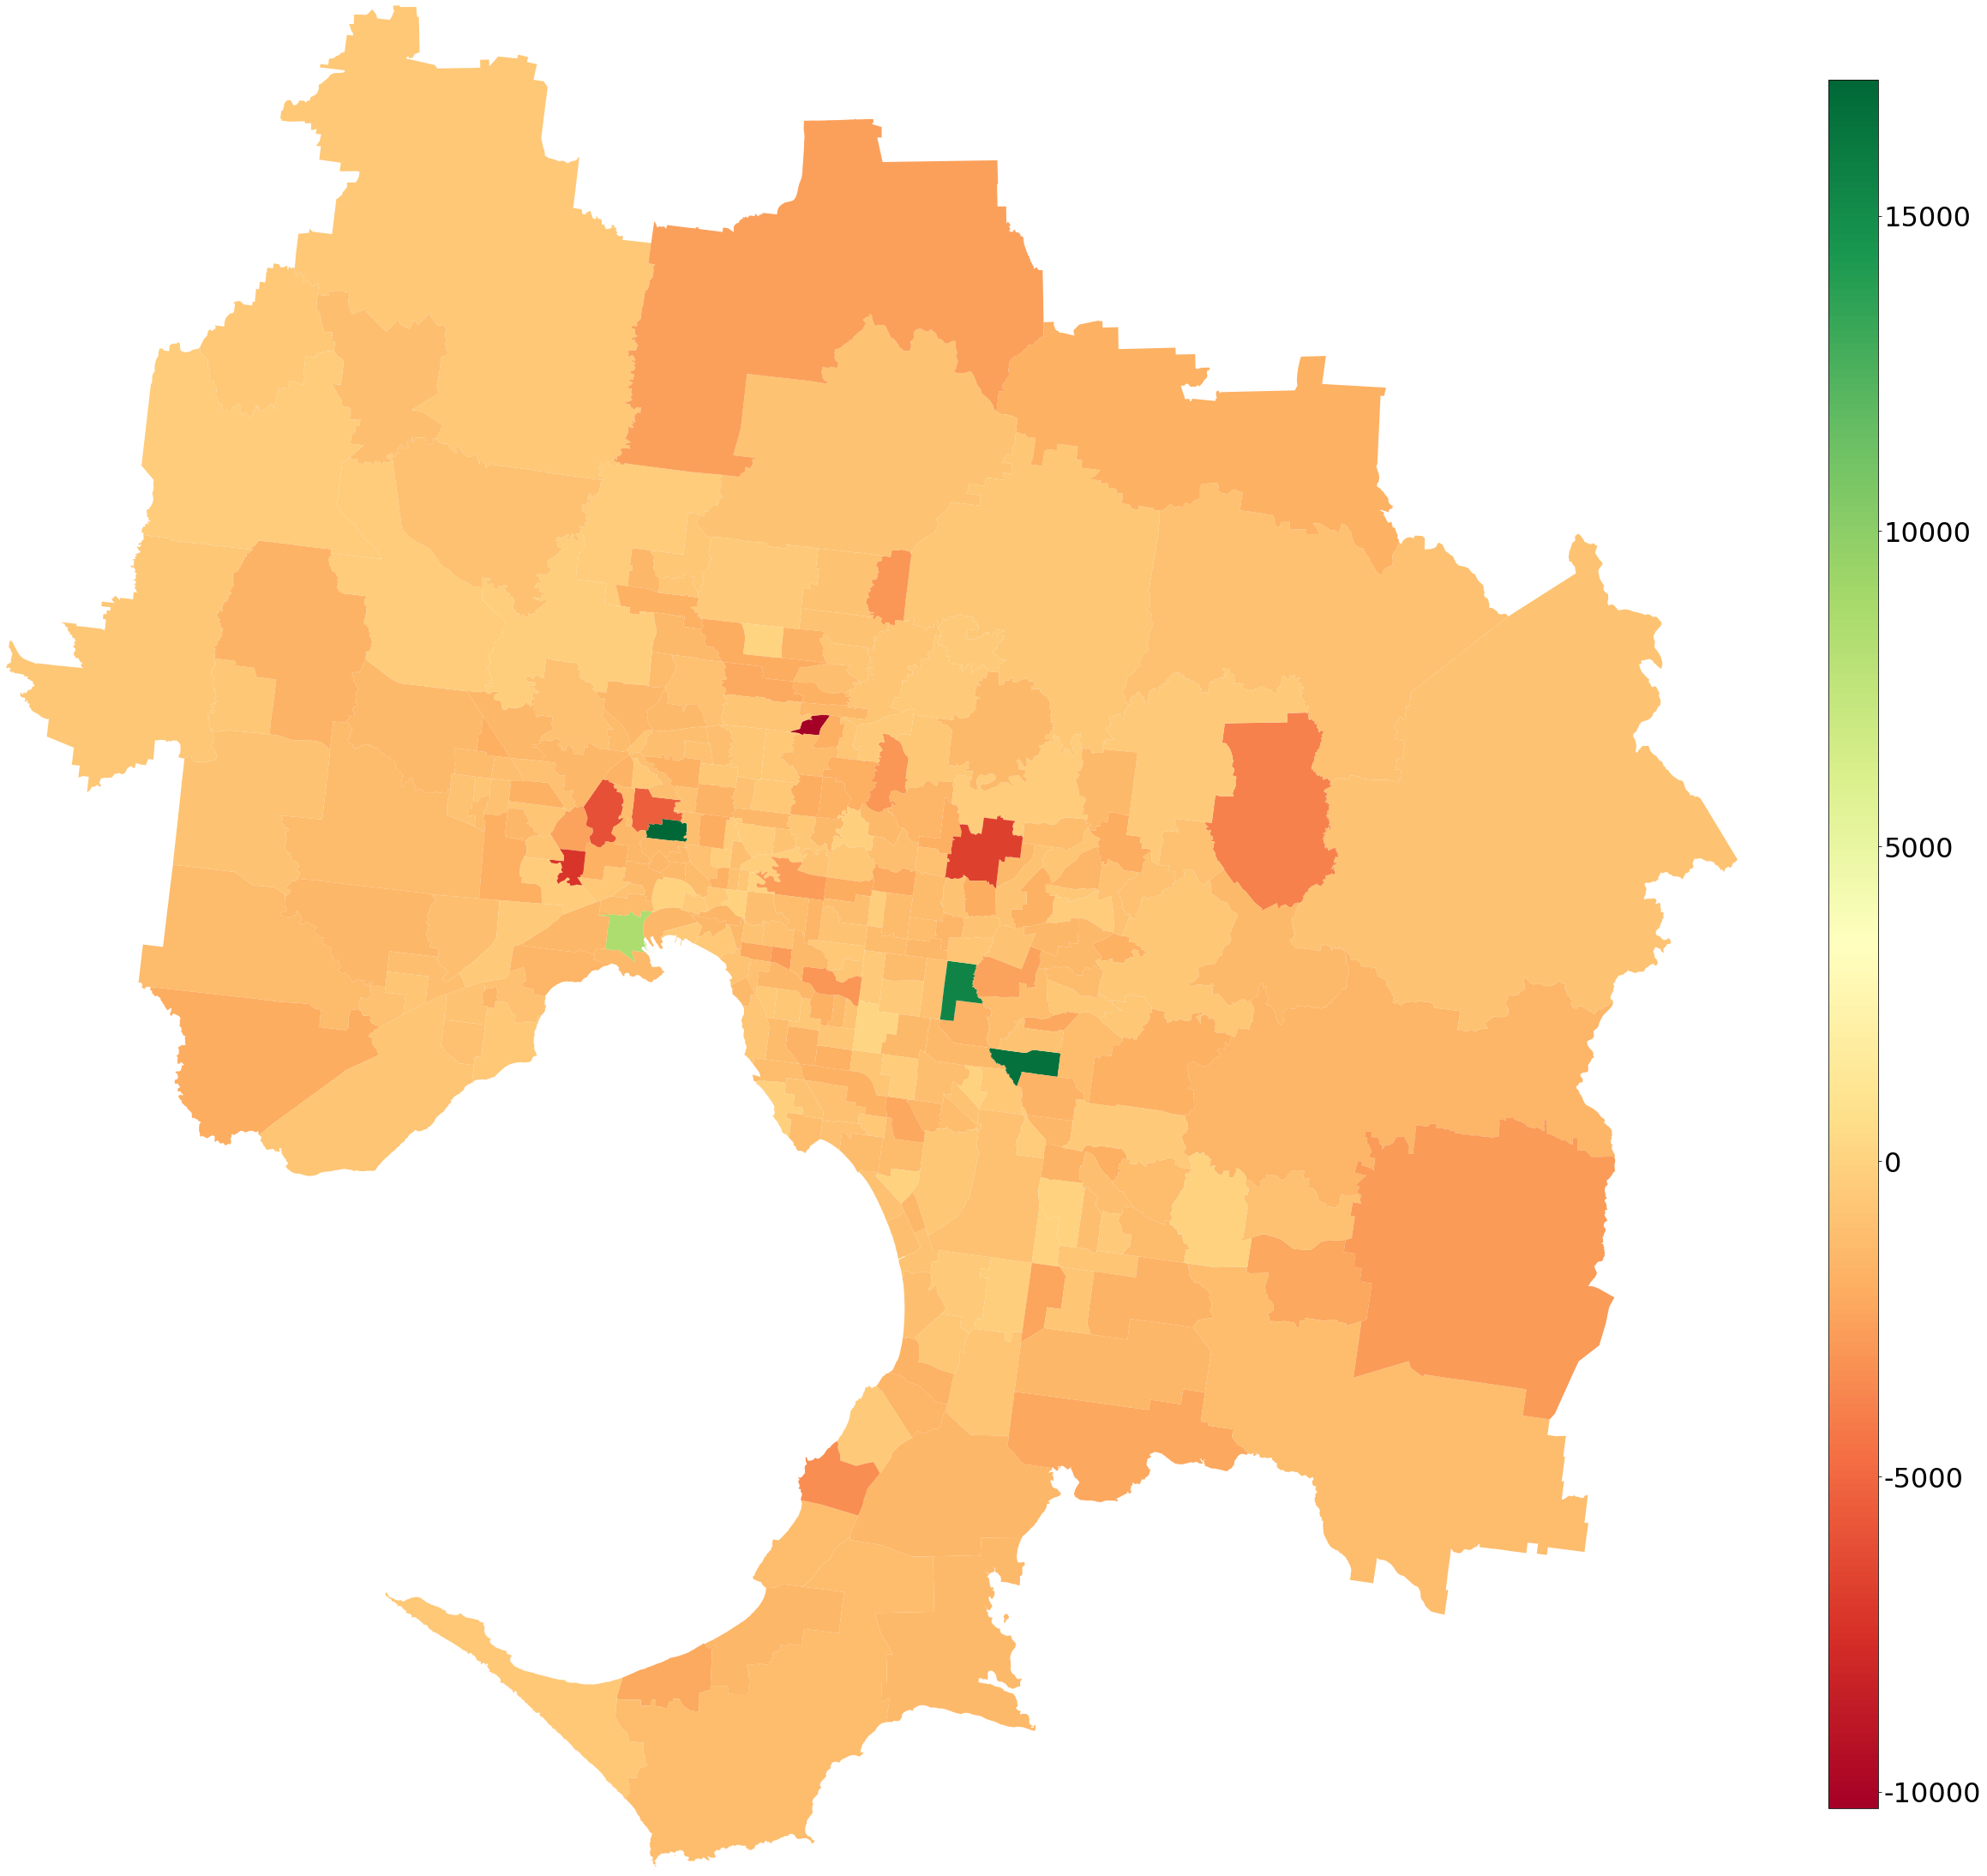

In [22]:
melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI

plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap='RdYlGn')

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap='RdYlGn',\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
#plt.savefig('melbourne_infect_dis_{}.jpg'.format(iterations))
plt.show()

(3000, 309)
3642702.717084158


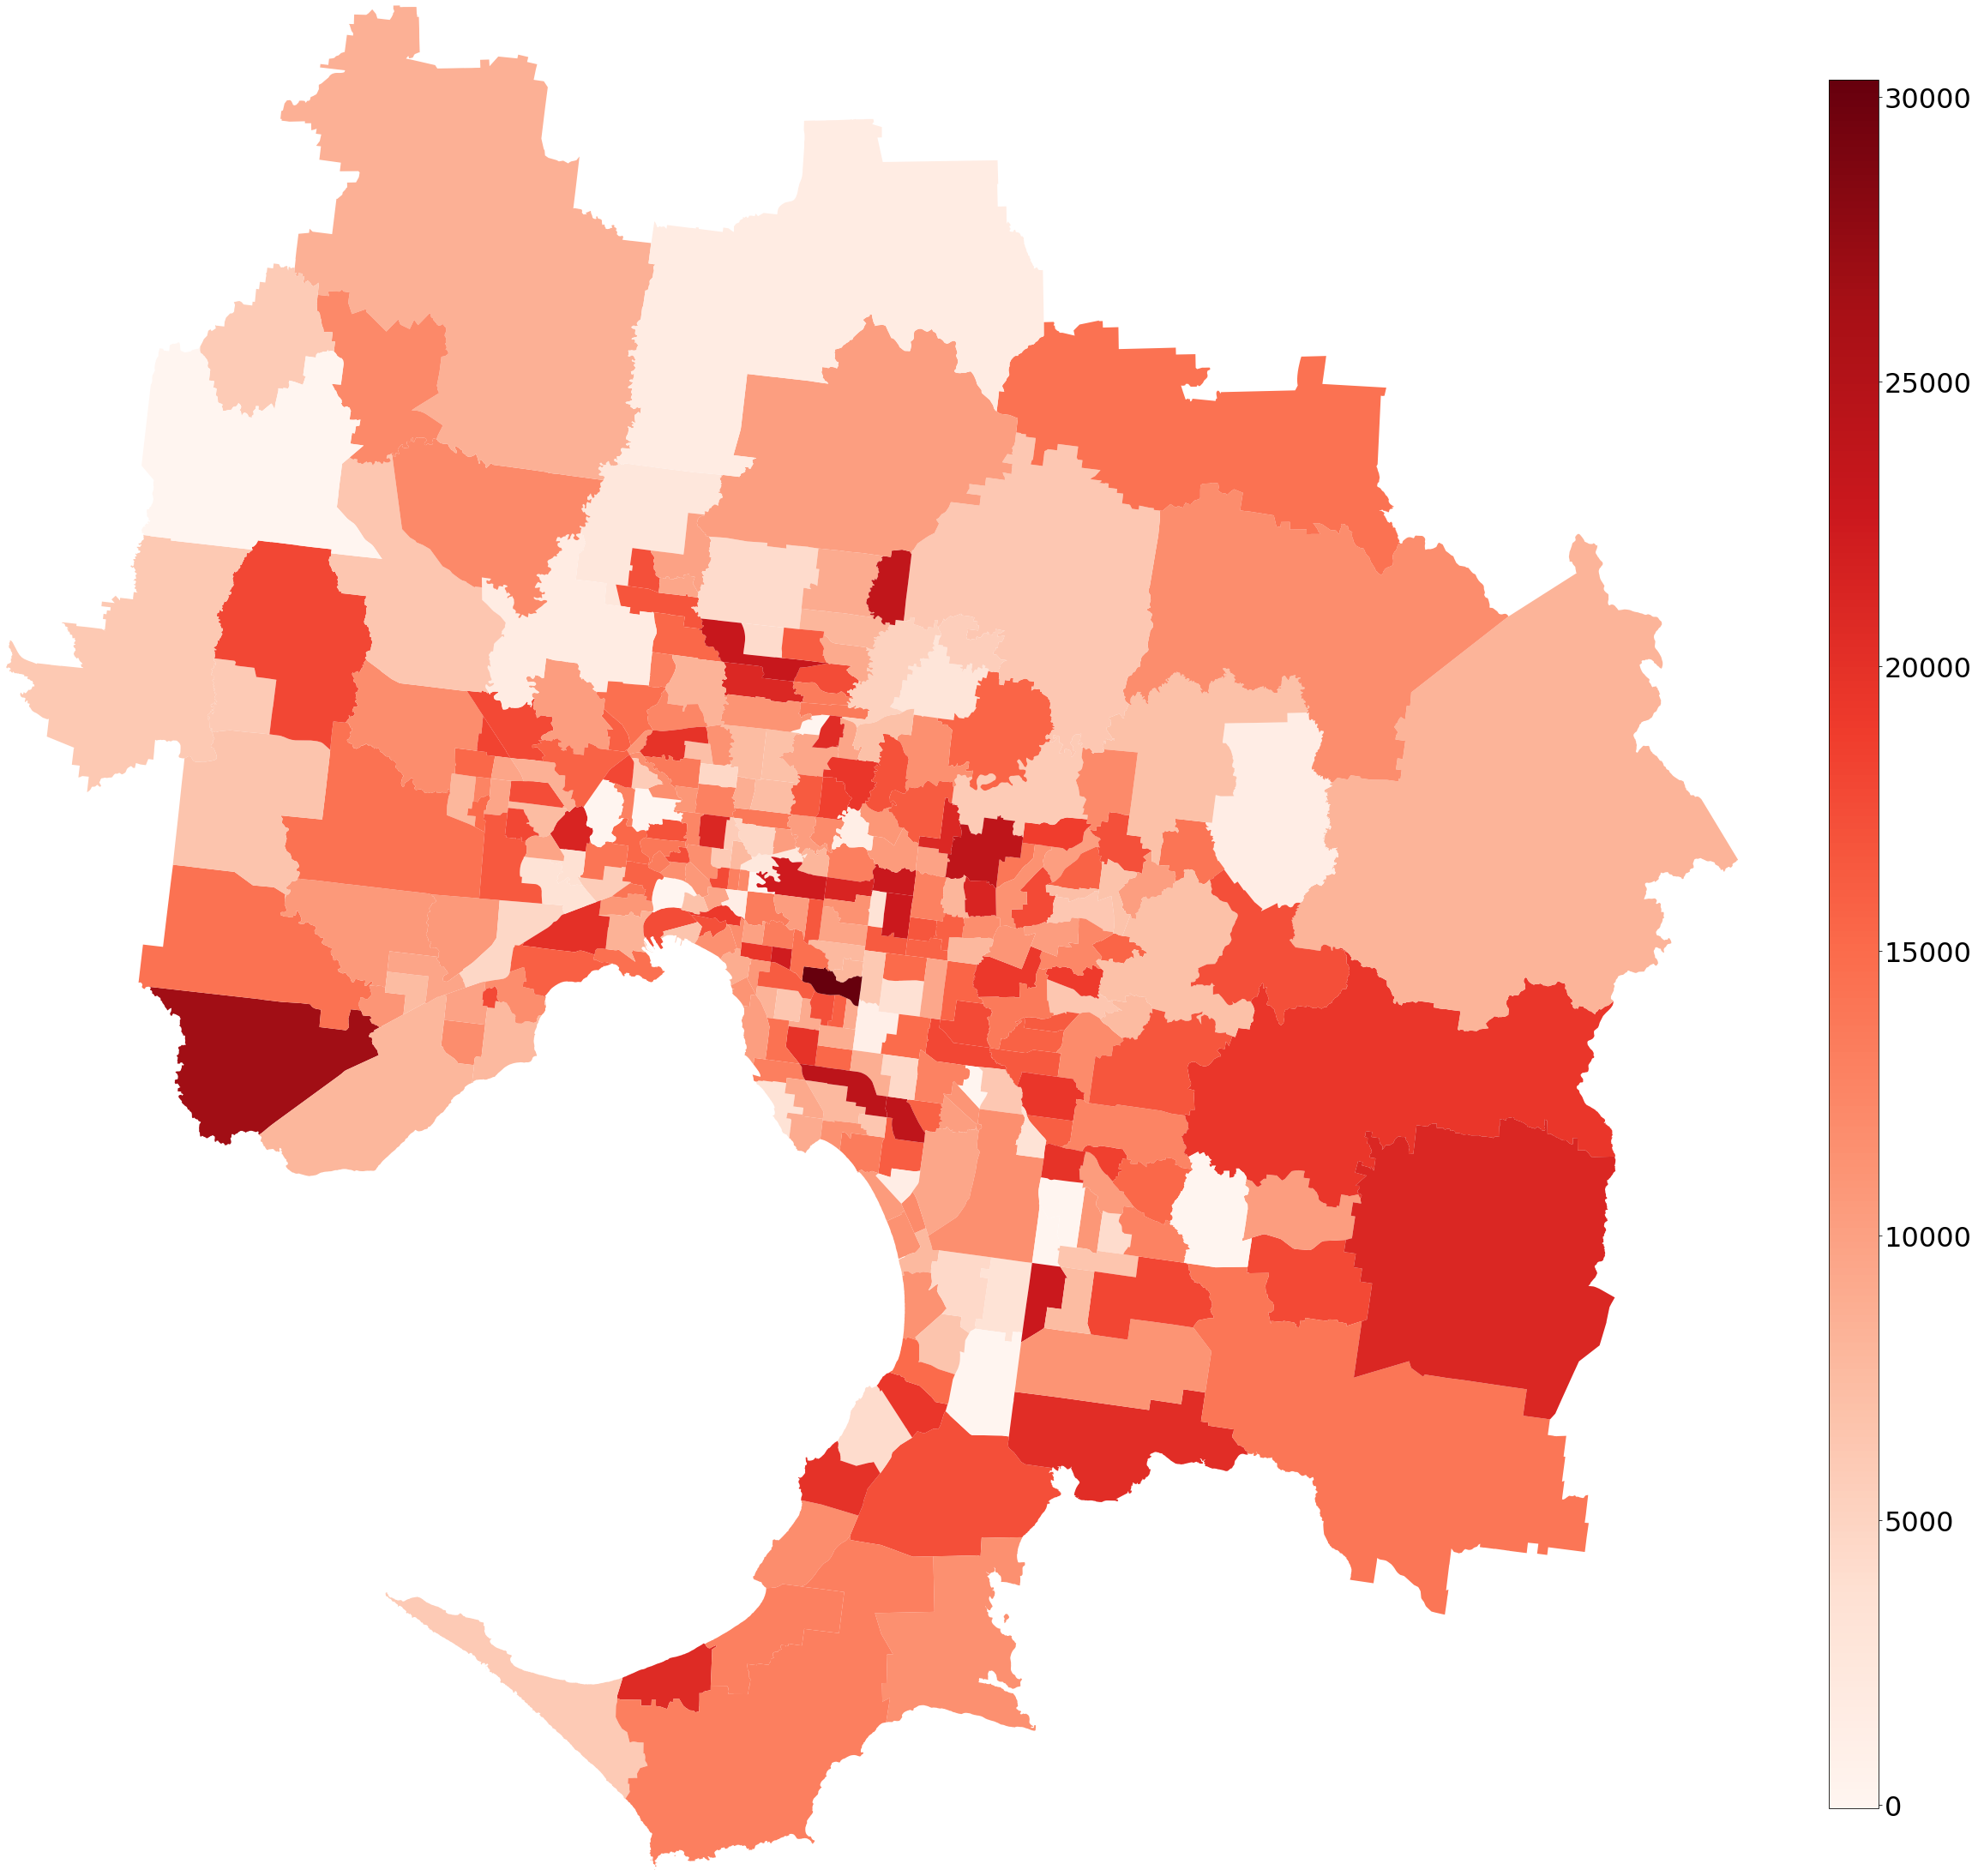

In [11]:
import geopandas as gpd
import contextily as ctx

#melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")


hosp = res['baseline'][0][::12,3]

newI = res['baseline'][2]

print(newI.shape)


newI.astype(int)

newI = np.sum(newI,axis=0)
print(np.sum(newI))

newI.astype(int)

melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI

plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap='Reds')

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap='Reds',\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
#plt.savefig('melbourne_infect_dis_{}.jpg'.format(iterations))
plt.show()

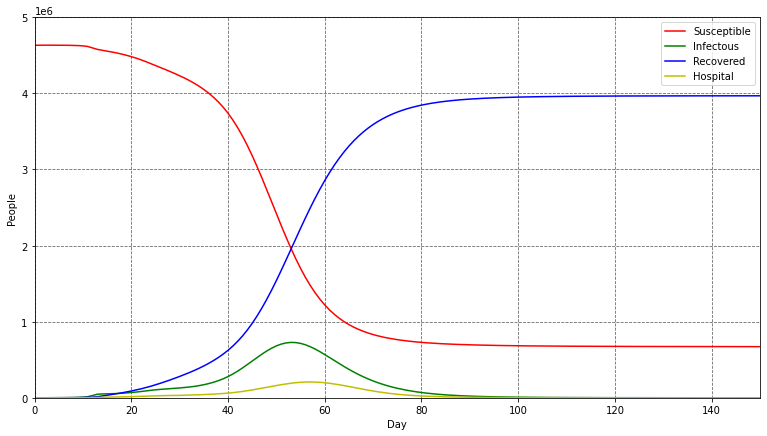

In [77]:
def sir_plot(res):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 150,1)
    plt.ylim(0, 5000000,1)
    plt.xlabel("Day") # Text for X-Axis
    plt.ylabel("People") 
    plt.plot(res[::12,0], color='r',label='Susceptible')
    plt.plot(res[::12,1], color='g',label='Infectous')
    plt.plot(res[::12,2], color='b',label='Recovered')
    plt.plot(res[::12,3], color='y',label='Hospital') 
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.legend(loc=1, prop={'size':9})
    plt.legend()
    plt.savefig('Melbounre_SIR_With_flow.jpg')
    
sir_plot(res["baseline"][0]) 

In [41]:
k = res['baseline'][0][::12,1]

In [39]:
n = res['baseline'][0][::12,1]

In [37]:
m = res['baseline'][0][::12,1]

In [35]:
z = res['baseline'][0][::12,1]

In [33]:
y = res['baseline'][0][::12,1]

In [31]:
x = res['baseline'][0][::12,1]

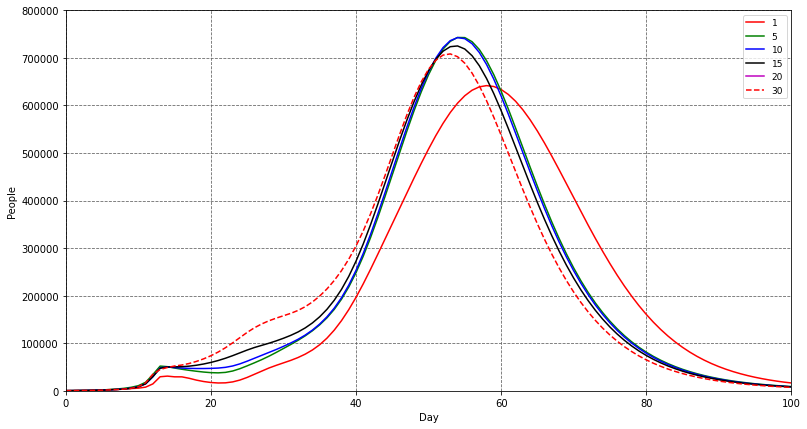

In [46]:
def sir_plot_r(x,y,z,i,g,h):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 800000,1)
    plt.xlabel("Day") # Text for X-Axis
    plt.ylabel("People") 
    plt.plot(x, color='r',label='1')
    plt.plot(y, color='g',label='5')
    plt.plot(z, color='b',label='10')
    plt.plot(i, color='k',label='15')
    plt.plot(g, color='m',label='20',linestyle='-')
    plt.plot(h, color='r',label='30',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.legend(loc=1, prop={'size':9})
    plt.savefig('intected_numberlocations.jpg')
    
sir_plot_r(x,y,z,m,n,k) 

In [77]:
k = res['baseline'][0][::12,1]

In [76]:
n = res['baseline'][0][::12,1]

In [74]:
m = res['baseline'][0][::12,1]

In [58]:
h = res['baseline'][0][::12,1]

In [60]:
g = res['baseline'][0][::12,1]

In [62]:
i = res['baseline'][0][::12,1]

In [64]:
z = res['baseline'][0][::12,1]

In [66]:
y = res['baseline'][0][::12,1]

In [68]:
x = res['baseline'][0][::12,1]

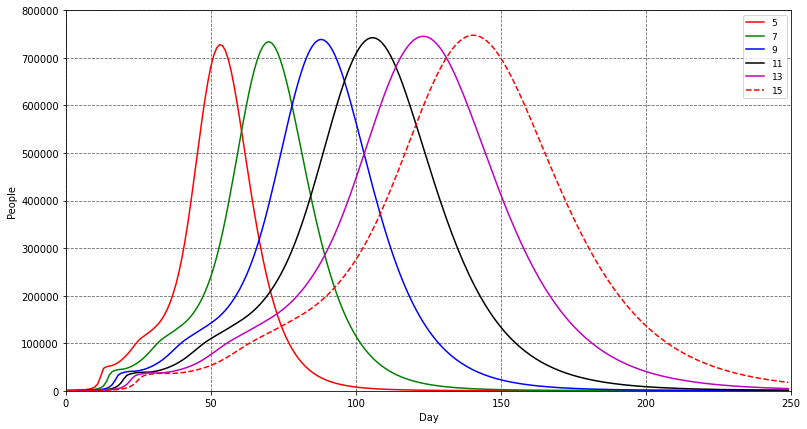

In [70]:
def sir_plot_r(x,y,z,i,g,h):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 250,1)
    plt.ylim(0, 800000,1)
    plt.xlabel("Day") # Text for X-Axis
    plt.ylabel("People") 
    plt.plot(x, color='r',label='5')
    plt.plot(y, color='g',label='7')
    plt.plot(z, color='b',label='9')
    plt.plot(i, color='k',label='11')
    plt.plot(g, color='m',label='13',linestyle='-')
    plt.plot(h, color='r',label='15',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.legend(loc=1, prop={'size':9})
    #plt.show()
    plt.savefig("intected_incubation.jpg")
    
sir_plot_r(x,y,z,i,g,h) 


(900, 309)
3879412.7005457534


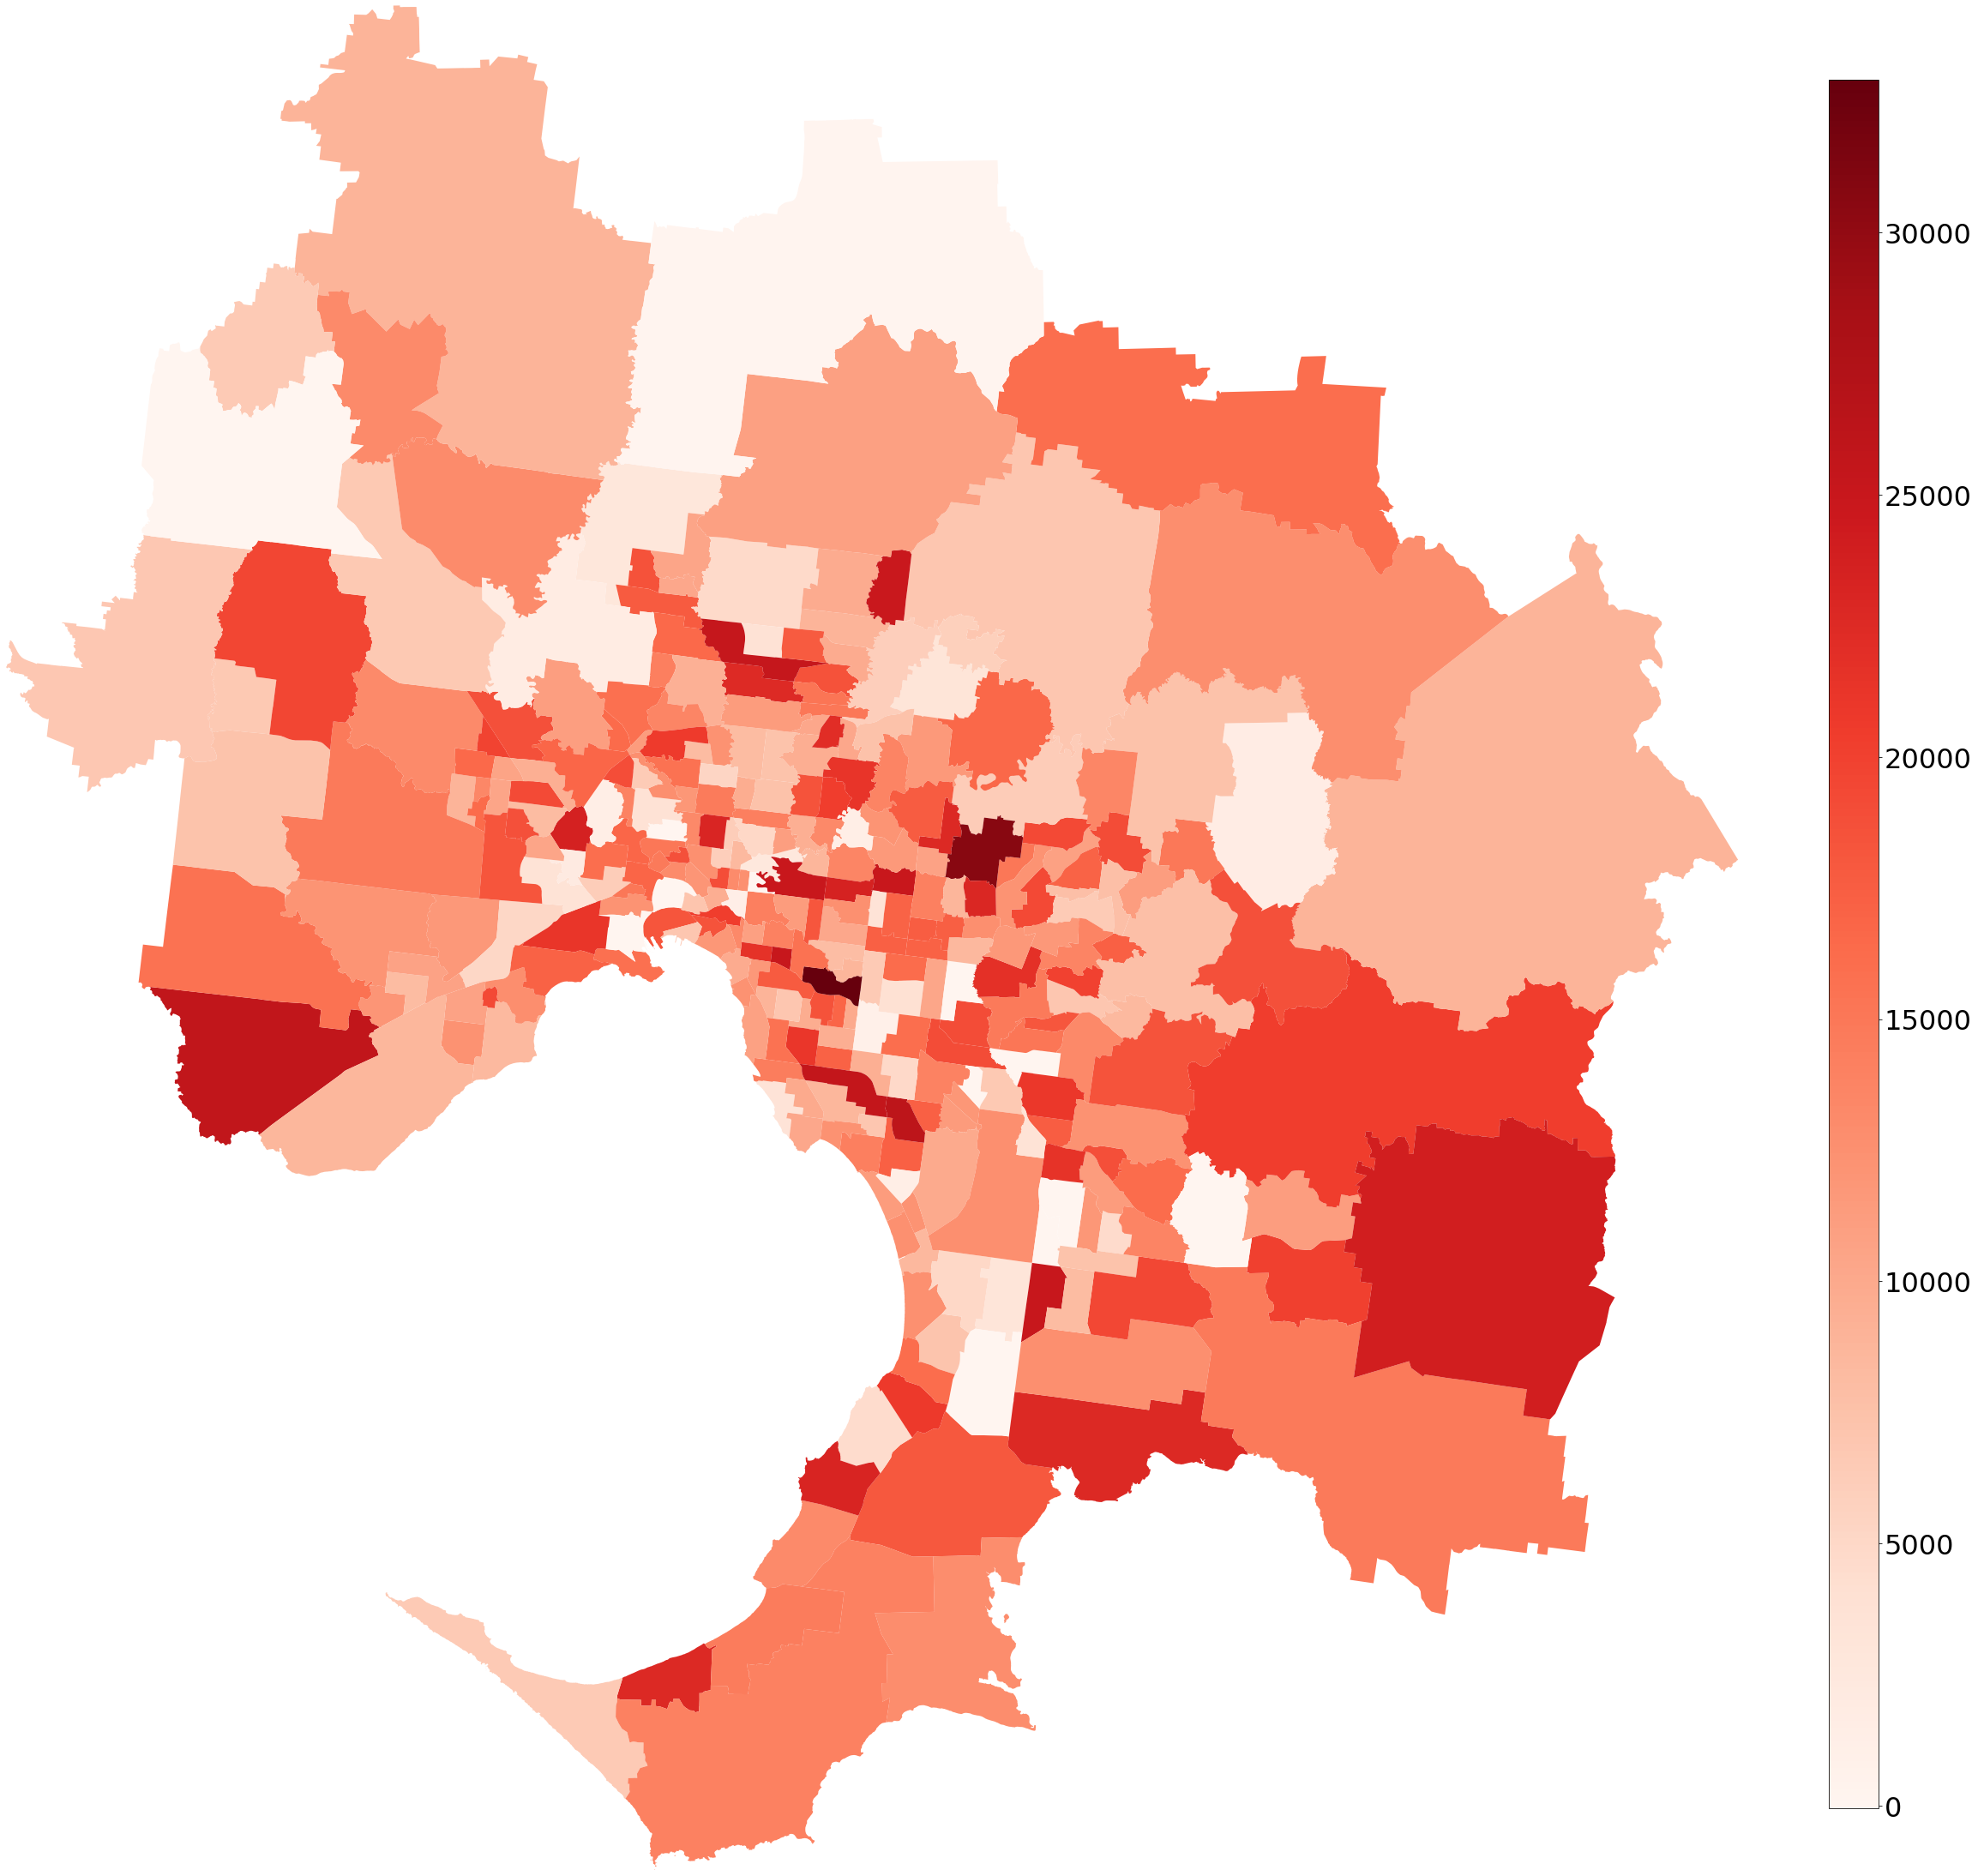

In [27]:
import geopandas as gpd
import contextily as ctx

melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")


hosp = res['baseline'][0][::12,3]

newI = res['baseline'][2]

print(newI.shape)


newI.astype(int)

newI = np.sum(newI,axis=0)
print(np.sum(newI))

newI.astype(int)

melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI

plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap='Reds')

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap='Reds',\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
plt.savefig('melbourne_infect_dis_{}.jpg'.format(iterations))
plt.show()

In [29]:
print(newI.astype(int))

[  896   924   471 22829  3220   170  1086   550    55   672  1281     0
   872 10460  1903 24626  9008  2395  2323   215  1856   587   732     0
  8514   234  2640  1251  1467  1061  5240   827   588   181  8102  1082
   738 17514   880   914   648 13943  1485   883  2298  9048  1249  8109
   855 11177   390   713  1377  1727  1793  1716  1027  4753   613  7892
   416  2463 13764  1146   366   807    -4  1575   932   369   264   650
  1976  2427 10647   321  1778  2104   376  2124  3064 12946   220 23196
  3296   506  9564  2625  1586     3   769   382   940   952  1166  1264
   586  1219  3524  2464  8566   368   738  5142   475  2677  2884 12935
  6996   728   772  2926   640   979   928    -4   674  1651  5151  1332
  4891  2270    -3   173 25180   806   652   527  1672  1162  2363 22487
     0     0  9644 10746   708  1445  3289   514   415  2863   520  6165
   936  1731   823  6787 12260  3712  4992  2279   543 15821  3392  2730
   -18  1207  6642  1349   795  1285  1861  1098   

Max number of hospitalised people:  287 
 Day with max hospitalised people:  6


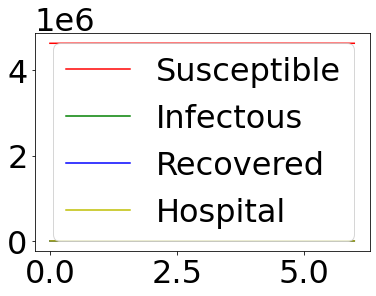

In [24]:
print(
"Max number of hospitalised people: ", int(res["baseline"][0][:,3].max()),
"\n",
"Day with max hospitalised people: ", int(res["baseline"][0][:,3].argmax()/12)
)
# plot result
sir_plot(res["baseline"][0])

(80, 309)
3038.6655866794713


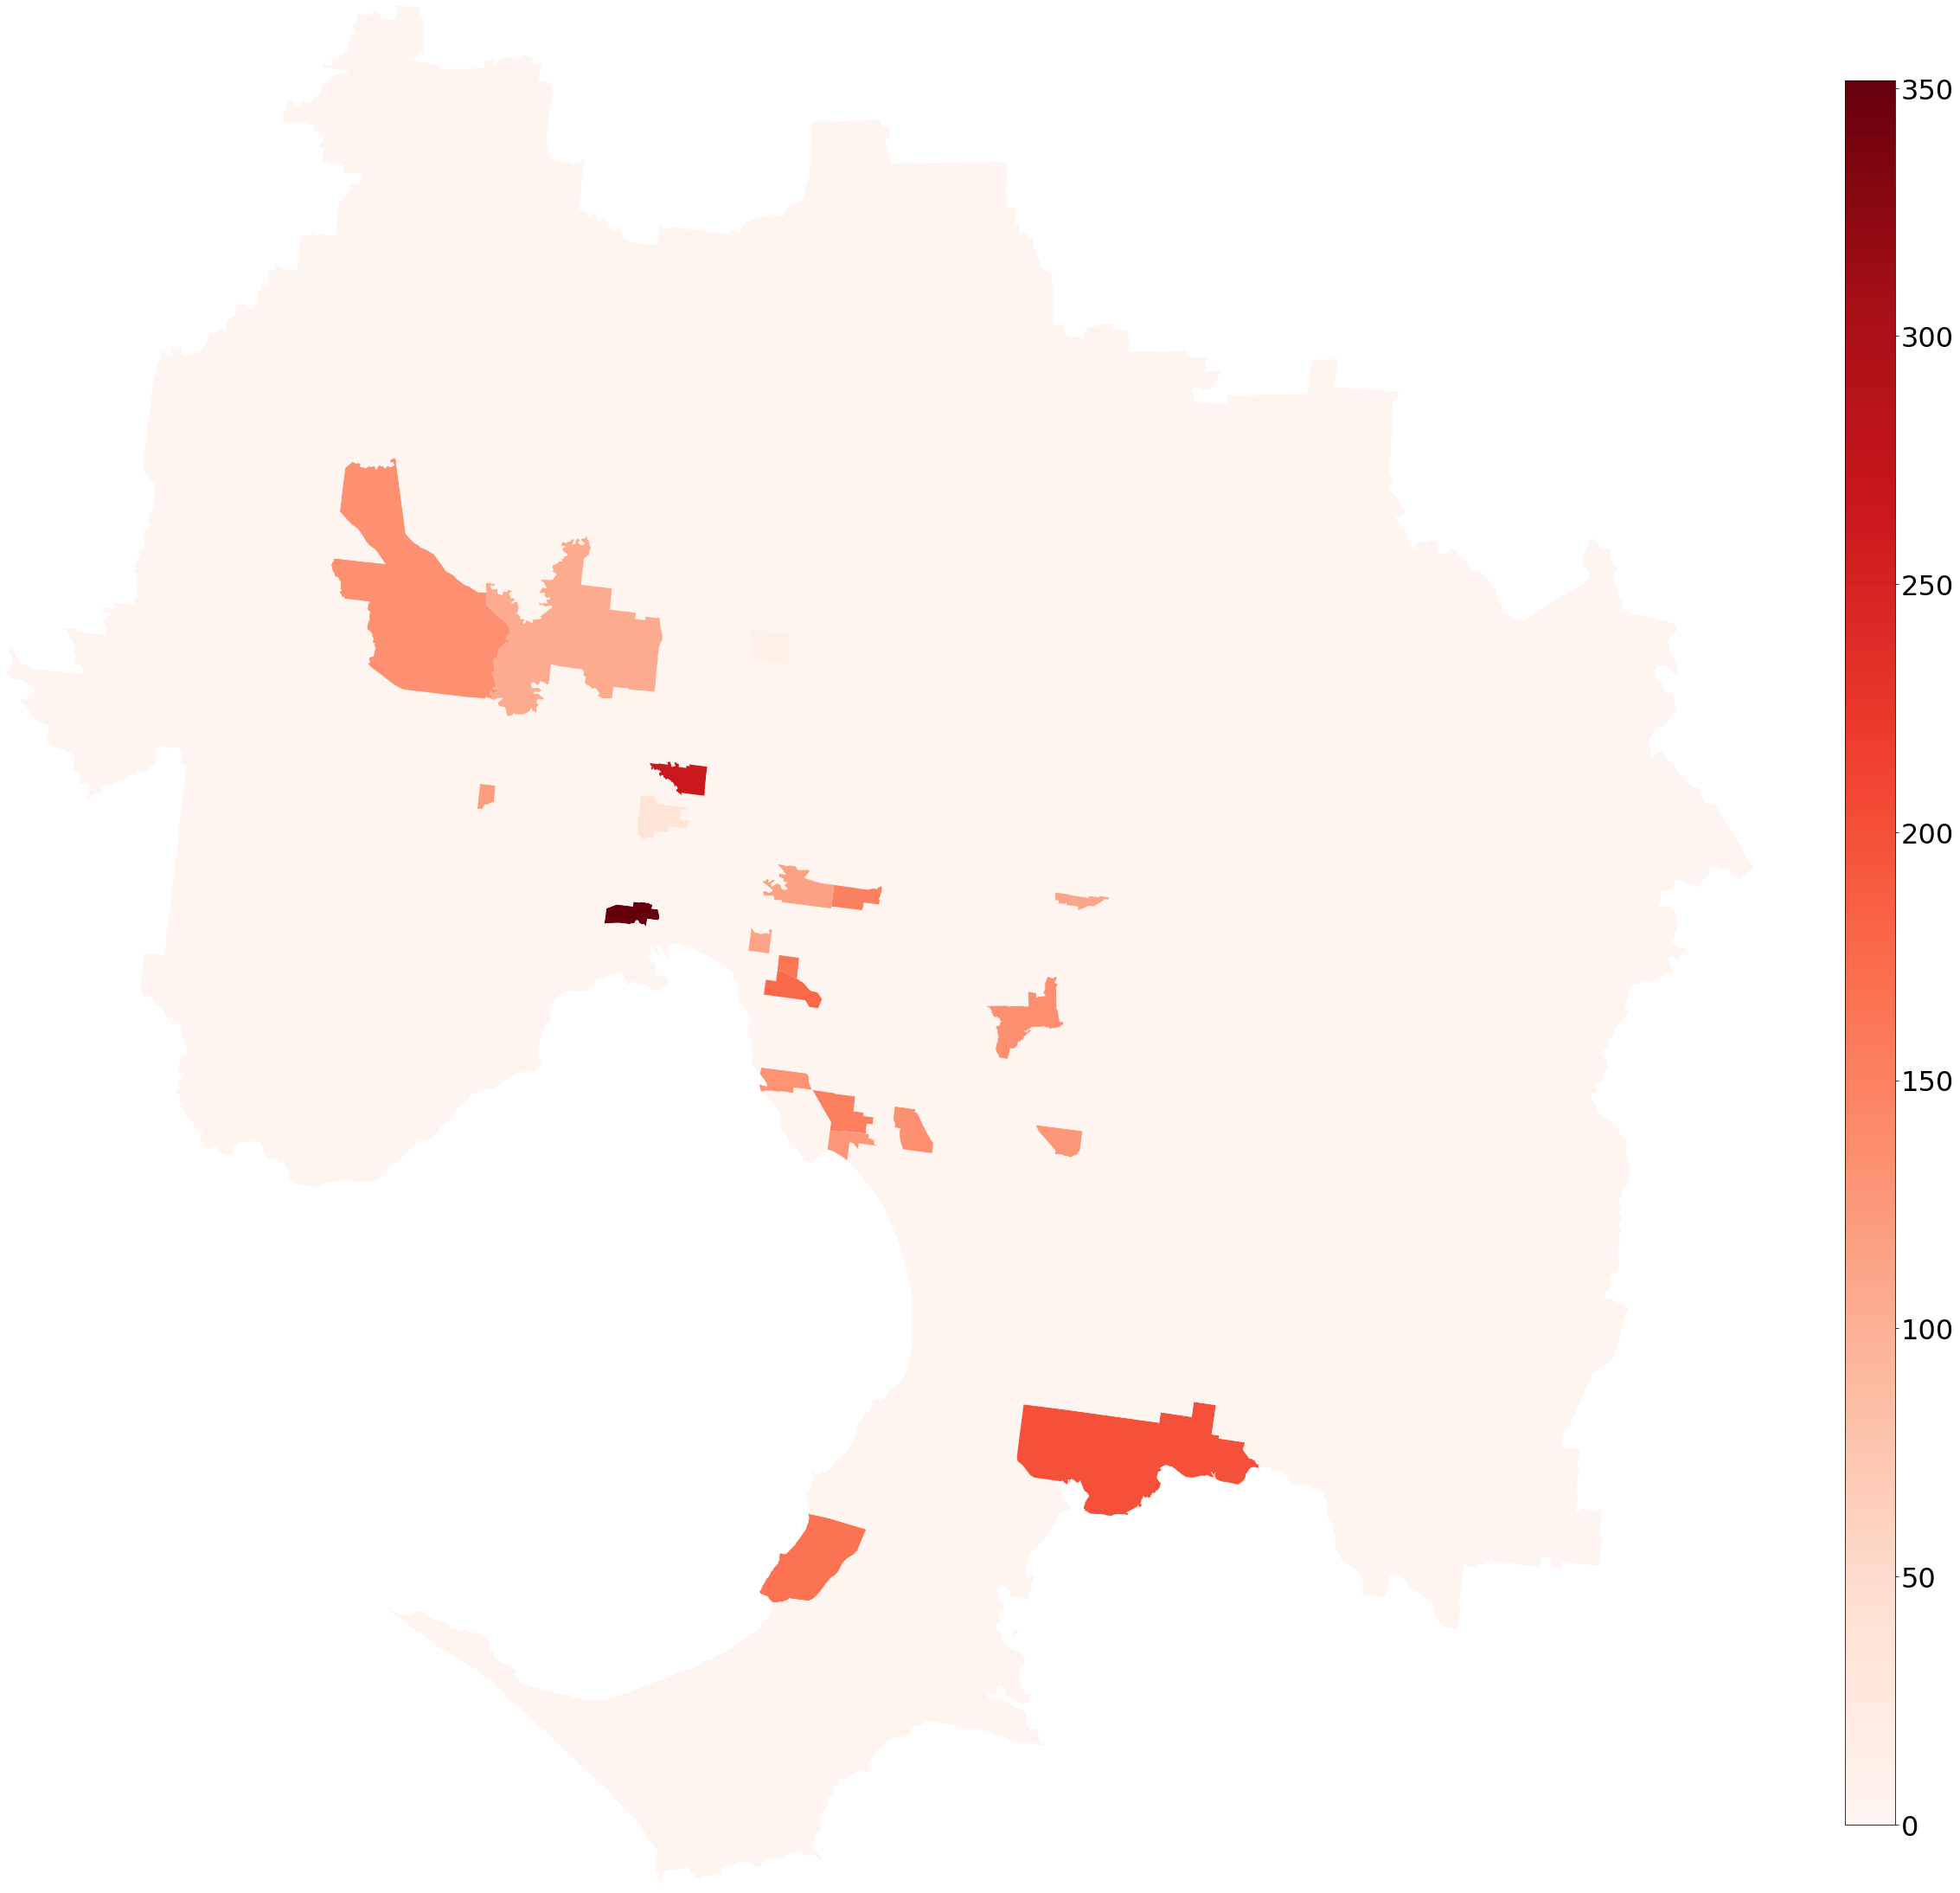

In [15]:
max(melbourne_gpd.population)

38.074291155993755

In [68]:
max_exp_ind = np.where(baseline[:,1,:] == baseline[:,1,:].max())[0].item()
max_exp_val = baseline[:,1,:].max()

print(max_exp_ind,max_exp_val)





ncolors = 256

color_array = plt.get_cmap('Reds')(range(ncolors))


#change alpha values
color_array[:,-1] = np.linspace(0.3,1,ncolors)
#create colormap objects
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

map_object = LinearSegmentedColormap.from_list(name="Reds_transp",colors=color_array)

#register the colormap object

plt.register_cmap(cmap=map_object)

fig,ax = plt.subplots()
h = ax.imshow(np.random.rand(100,100),cmap='Reds_transp')
plt.colorbar(mappable=h)

print(color_array)

def trunc_colormap(cmap,minval=0.0, maxval=1.0,n=100):
    new_cmap = LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name,a=minval,b=maxval),
                                                cmap(np.linspace(minval,maxval,n)))
    return new_cmap

cmap = plt.get_cmap('Reds_transp')
new_cmap = trunc_colormap(cmap,0.0,.9)

fig,ax = plt.subplots()
h = ax.imshow(np.random.rand(100,100),cmap='Reds_transp')
plt.colorbar(mappable=h)

print("Baseline dimension ", baseline.shape)
print("hosp dimension ", hosp.shape)

baseline[:3,0].sum(axis=1)

params = {"axes.labelcolor":"slategrey"}
plt.rcParams.update(params)

cmap = plt.cm.get_cmap("Blues")
blue = cmap(200)

from tqdm import tqdm_notebook

for time_step in tqdm_notebook(range(1,251)):
    
    melbourne_gdf_3857['exposed'] = baseline[time_step-1,1,:]
    
    #plot
    fig,ax = plt.subplots(figsize=(14,14), dpi=72)
    melbourne_gdf_3857.loc[melbourne_gdf_3857.index==84,'exposed'] = max_exp_val + 1
    melbourne_gdf_3857.plot(ax=ax,facecolor='none',edgecolor='gray',alpha=0.5,linewidth=0.5,zorder=2)
    melbourne_gdf_3857.plot(ax=ax,column='exposed',cmap=new_cmap,zorder=3)
    
    #background
    ctx.add_basemap(ax,attribution="",url=ctx.sources.ST_TONER_LITE,zoom='auto',alpha=0.6)
    
    ax.set_xlim(west,east)
    ax.set_ylim(south,north)
    ax.axis('off')
    plt.tight_layout()
    
    inset_ax = fig.add_axes([0.6,0.14,0.37,0.27])
    inset_ax.patch.set_alpha(0.5)
    
    inset_ax.plot(baseline[:time_step,0].sum(axis=1),label="susceptible",color=blue,ls='-',lw=1.5,alpha=0.8)
    inset_ax.plot(baseline[:time_step,1].sum(axis=1),label="infectious",color='r',ls='-',lw=1.5,alpha=0.8)
    inset_ax.plot(baseline[:time_step,2].sum(axis=1),label="recovered",color='y',ls='-',lw=1.5,alpha=0.8)
    inset_ax.plot(hosp[:time_step],label="hospitalized",color='purple',ls='-',lw=1.5,alpha=0.8)
    
    inset_ax.scatter((time_step-1), baseline[(time_step-1),0].sum(), color=blue,s=50,alpha=0.2)
    inset_ax.scatter((time_step-1), baseline[(time_step-1),1].sum(), color='r',s=50,alpha=0.2)
    inset_ax.scatter((time_step-1), baseline[(time_step-1),2].sum(), color='y',s=50,alpha=0.2)
    inset_ax.scatter((time_step-1), hosp[(time_step-1)], color='purple',s=50,alpha=0.2)       
                
    inset_ax.scatter((time_step-1), baseline[(time_step-1),0].sum(), color=blue,s=20,alpha=0.8)
    inset_ax.scatter((time_step-1), baseline[(time_step-1),1].sum(), color='r',s=20,alpha=0.8)
    inset_ax.scatter((time_step-1), baseline[(time_step-1),2].sum(), color='y',s=20,alpha=0.8)
    inset_ax.scatter((time_step-1), hosp[(time_step-1)], color='purple',s=20,alpha=0.8) 
    
    inset_ax.fill_between(np.arange(0, time_step), np.maximum(baseline[:time_step,0].sum(axis=1), \
                                                              baseline[:time_step,2].sum(axis=1)), alpha=0.035,color='r')
    inset_ax.plot([time_step,time_step], [0,max(baseline[(time_step-1),0].sum(),\
                                             baseline[(time_step-1),2].sum())], ls='--', lw=0.7,alpha=0.8, color='r')
    
    inset_ax.set_ylabel('Population',size=18,alpha=1,rotation=90)
    inset_ax.set_xlabel('Days', size=18,alpha=1)
    inset_ax.yaxis.set_label_coords(-0.15,0.55)
    inset_ax.tick_params(direction = 'in', size=10)
    inset_ax.set_xlim(-4,254)
    inset_ax.set_ylim(-24000,1024000)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    inset_ax.grid(alpha=0.4)
    
    inset_ax.spines['right'].set_visible(False)
    inset_ax.spines['top'].set_visible(False)
    
    inset_ax.spines['left'].set_color('darkslategrey')
    inset_ax.spines['bottom'].set_color('darkslategrey')
    inset_ax.tick_params(axis = 'x', color='darkslategrey')   
    inset_ax.tick_params(axis = 'y', color='darkslategrey')
    plt.legend(prop={'size':14,'weight':'light'},framealpha=0.5)
    
    plt.title("Melbourne Covid-19 spreading on day: {}".format(time_step),fontsize=18,color='dimgray')
    
    plt.savefig("Plots/flow_{}.jpg".format(time_step),dpi=fig.dpi)
    plt.show()
    

import re

def sort_in_order(l):
    convert = lambda text:int(text)if text.isdigit() else text
    alphanumeric_key = lambda key:[convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(l,key=alphanumeric_key)

from os import listdir

filenames=listdir("Plots/")
filenames= sort_in_order(filenames)

filenames

import imageio

with imageio.get_writer('Covid_19_mel.gif', mode='I',fps=16) as writer:
    for filename in tqdm_notebook(filenames):
        image = imageio.imread('Plots/{}'.format(filename))
        writer.append_data(image)



15 21350.65636997332
